In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\Younjiei\\Desktop\\패스트캠퍼스\\머신러닝&데이터분석\\2. [Machine Learning]\\PART 2) 회귀분석\\1. Jupyter Notebook ( Typing 용)'

# 단순선형회귀분석(선형회귀실습자료와동일)

In [5]:
# 데이터 불러오기
boston = pd.read_csv("../3. 실습데이터/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [6]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [7]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [8]:
target = boston[['Target']]
# boston_target
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston['LSTAT']

In [12]:
crim1 = sm.add_constant(crim, has_constant='add')#상수항 추가

In [13]:
model1 = sm.OLS(target,crim1)
fitted_model1=model1.fit()


In [14]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 16 May 2020   Prob (F-statistic):           1.17e-19
Time:                        08:20:36   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred1=fitted_model1.predict(crim1)

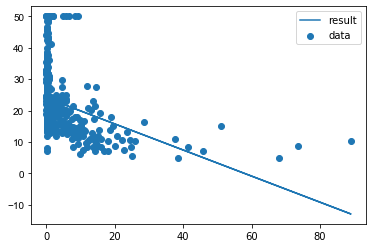

In [36]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(crim,target,label="data")
plt.plot(crim,pred1,label="result")
plt.legend()
plt.show()

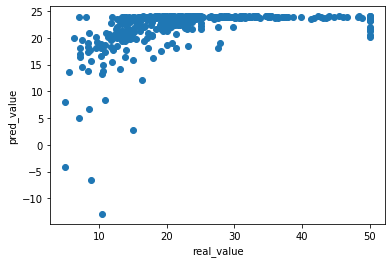

In [37]:

plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

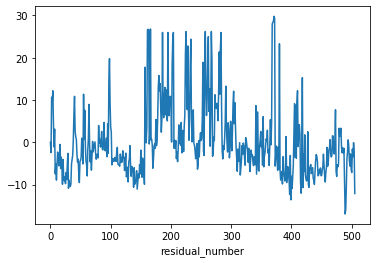

In [38]:
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [39]:
sum(fitted_model1.resid)

-7.904787935331115e-13

In [40]:
rm1 = sm.add_constant(rm, has_constant='add')
lstat1 = sm.add_constant(lstat, has_constant='add')

In [41]:
model2 = sm.OLS(target,rm1)
fitted_model2=model2.fit()
model3 = sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [42]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 16 May 2020   Prob (F-statistic):           2.49e-74
Time:                        08:24:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 16 May 2020   Prob (F-statistic):           5.08e-88
Time:                        08:24:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)


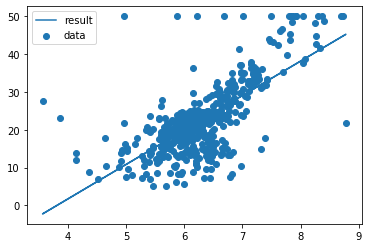

In [45]:
plt.scatter(rm,target,label="data")
plt.plot(rm,pred2,label="result")
plt.legend()
plt.show()

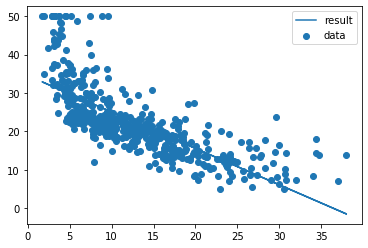

In [46]:
plt.scatter(lstat,target,label="data")
plt.plot(lstat,pred3,label="result")
plt.legend()
plt.show()

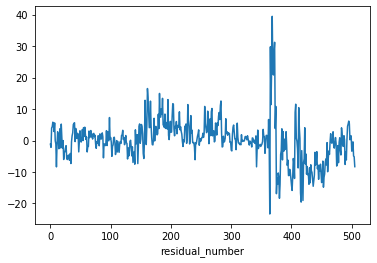

In [47]:
fitted_model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

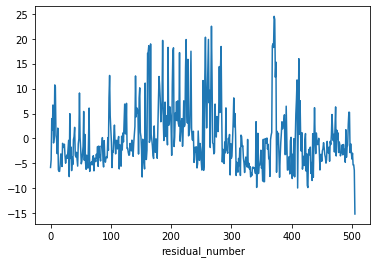

In [28]:
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

# 다중선형회귀분석
## crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [33]:
## bostan data에서 crim, rm, lstat 변수만 뽑아오기 
x_data=boston[['CRIM','RM','LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [49]:
#상수항 추기
x_data1=sm.add_constant(x_data,has_constant='add')

In [52]:
# 회구모델 적합
multi_model=sm.OLS(target,x_data1)
mul_model=multi_model.fit()

In [61]:
# summary함수를 통해 결과출력 
mul_model.summary()
#R^2를 보면 다중공선성이 조금은 있지만 p-value가 셋다 낮으므로 써도 ㄱ나쁘지 않다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.01e-112
Time:                        08:43:28   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2811      1.583     -0.809      0.419      -4.391       1.829
const         -1.2811      1.583     -0.809      0.419      -4.391       1.829
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                     2.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 단순선형회귀모델의 회귀계수와 비교 

In [62]:
## 단순선형회귀모델의 회귀 계수
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)


const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [63]:
## 다중선형회귀모델의 회귀 계수
print(mul_model.params)
#crim,rm,lstat모두 단순선형과 다중했을때 회기계수가 달라졌다
#R^2- 각각의 변수들이 중복되는 변동성을 다 가져가지 못한다-다중공선성

const   -1.281126
const   -1.281126
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 행렬연산을 통해 beta구하기 -(sse를 최소화 시켜서 beta구하기)
### 다중은 행렬로, 단순은 sse를b0,b1로 편미분(미분해서 0이 되는곳이 sse최소값이므로)

In [69]:
from numpy import linalg ##행렬연산을 통해 beta구하기 B=(x'x)-1x'y
p=linalg.inv(np.dot(x_data.T,x_data))
np.dot(np.dot(p,x_data.T),target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [71]:
print(mul_model.params) #이렇게 구한것과 같음

const   -1.281126
const   -1.281126
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


In [74]:
# y_hat구하기 
pred4=mul_model.predict(x_data1)

### residual plot

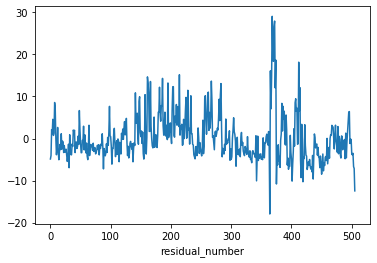

In [75]:
mul_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

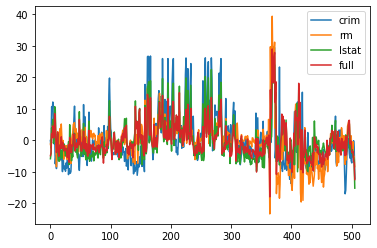

In [81]:
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
mul_model.resid.plot(label="full")
plt.legend()
#full모델이 가장 잔차가 적음(R^2가 커서->학습데이터에 했을때는 잔차가 적음)
#그러나 학습데이터 이외에서도 잔차가 작은가는 모름